In [1]:
from pathlib import Path

from darwin.torch.dataset import InstanceSegmentationDataset
from darwin.torch.transforms import ConvertPolygonsToInstanceMasks

In [2]:
root = Path('/Users/andrea/.darwin/datasets/complex')
split = Path('/Users/andrea/.darwin/datasets/complex/lists/split/random_train.txt')
with open(split, 'r') as f:
    for line in f:
        print(line)
dataset = InstanceSegmentationDataset(root, split)

1



In [3]:
import json

jsonfile = Path('/Users/andrea/Downloads/11.json')
segmentations = []
with open(jsonfile, 'r') as f:
    a = json.load(f)
    for b in a['annotations']:
        if 'complex_polygon' in b:
            path = b['complex_polygon']['path']
            path = [[[q['x'], q['y']] for q in p] for p in path]
        else:
            path = b['polygon']['path']
            path = [[[p['x'], p['y']] for p in path]]
        segmentations.append([[c for q in p for c in q] for p in path])
print(segmentations)

[[[19.79, 16.87, 19.79, 14.66, 19.73, 14.66, 19.66, 14.6, 18.54, 14.6, 18.41, 14.66, 18.35, 14.86, 18.31, 15.05, 17.84, 15.05, 17.84, 15.3, 17.65, 15.68, 17.58, 15.87, 17.52, 16.0, 17.46, 16.25, 17.46, 16.38, 17.39, 16.51, 17.39, 18.33, 17.46, 18.46, 17.52, 18.52, 17.52, 18.58, 17.65, 18.65, 19.09, 18.65, 19.22, 18.58, 19.47, 18.33, 19.54, 18.2, 19.6, 17.89, 19.66, 17.7, 19.73, 17.38, 19.73, 17.12], [23.4, 20.73, 23.38, 20.66, 23.06, 19.77, 22.8, 19.33, 22.49, 18.95, 22.11, 18.63, 21.92, 18.44, 21.54, 18.19, 21.15, 18.0, 20.96, 17.93, 20.79, 17.9, 20.72, 17.93, 20.53, 18.12, 20.28, 18.31, 20.09, 18.44, 19.9, 18.69, 19.58, 19.01, 19.45, 19.26, 19.2, 19.58, 19.01, 19.96, 18.95, 20.28, 18.82, 20.66, 18.76, 20.91, 18.69, 21.42, 18.69, 21.99, 18.66, 22.27, 18.69, 22.55, 18.69, 22.8, 18.76, 23.19, 18.82, 23.44, 18.95, 23.82, 19.01, 24.07, 19.2, 24.39, 19.39, 24.64, 19.9, 25.15, 19.96, 25.34, 20.28, 25.66, 20.41, 25.85, 20.6, 25.98, 20.98, 26.17, 21.14, 26.22, 21.41, 26.04, 21.6, 25.79, 21.79

In [4]:
dataset[0]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x12AE185F8>,
 {'boxes': tensor([[ 799.8100,  289.5000,  974.3300,  564.4800],
          [1143.8900,  162.3400, 1355.1500,  379.9700]]),
  'labels': tensor([1, 1]),
  'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
  
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
  'image_id': tensor([0]),
  'area': tensor([53945.0625, 37230.7422]),
  'iscrowd': tensor([0, 0])})

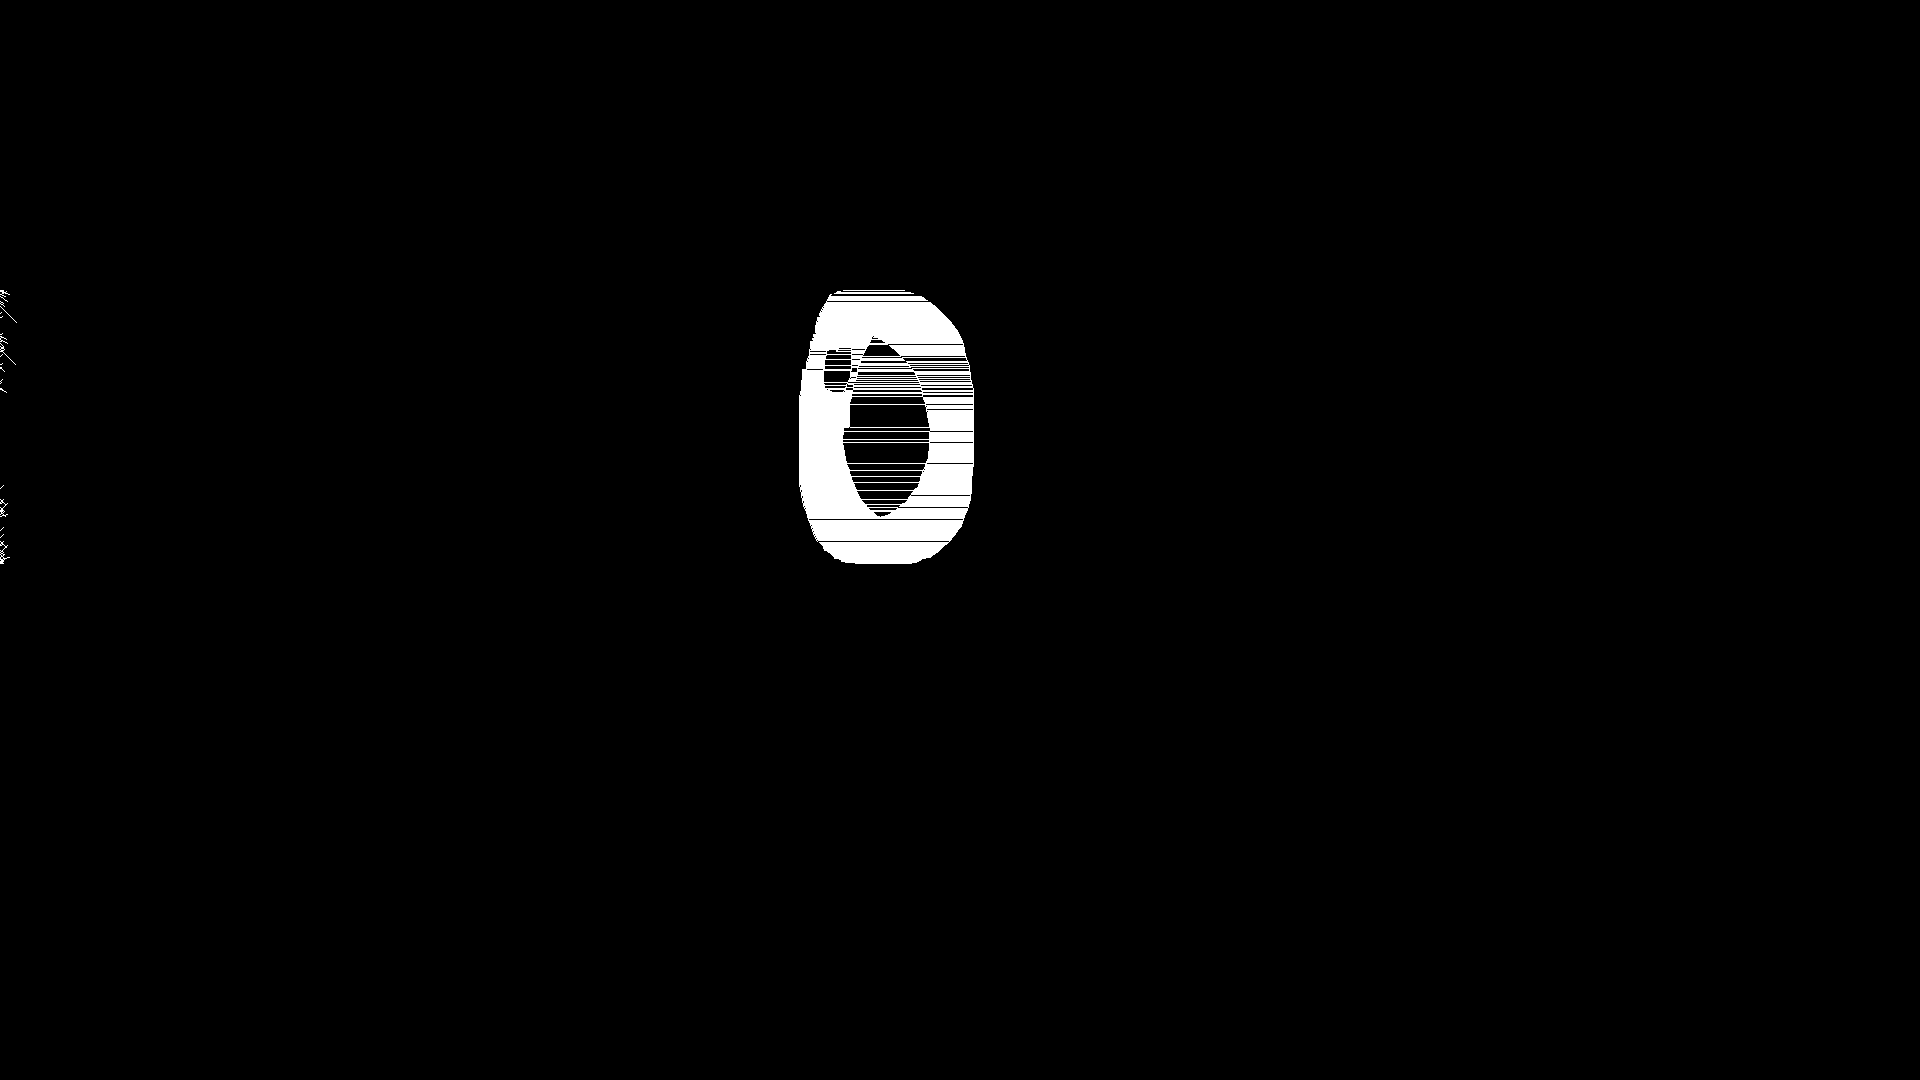

In [6]:
import torch
import torchvision.transforms as transforms

transforms.ToPILImage()(dataset[0][1]['masks'][0] * 255)

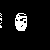

In [25]:
import numpy as np
import torch
import torchvision.transforms as transforms
from upolygon import draw_polygon

masks = []
for contour in segmentations:
    mask = torch.zeros((50, 50)).numpy().astype(np.uint8)
    mask_t = torch.from_numpy(np.asarray(draw_polygon(mask, contour, 255)))
    im = transforms.ToPILImage()(mask_t)
    masks.append(mask_t)
    break
# transforms.ToPILImage()(torch.stack(masks))
im